In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_csv.csv")

In [24]:
df.head()


,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [25]:
df['A10-score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient']].sum(axis=1)


In [26]:
df = df.drop(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient', 'Anxiety_disorder'], axis = 1)

In [27]:
df["Ethnicity"].value_counts()

White European    549
Asian             392
Middle Eastern    362
asian             213
south asian       206
South Asian        49
Black              45
middle eastern     41
Hispanic           40
Others             35
Latino             26
black               8
PaciFica            8
Mixed               7
Native Indian       3
mixed               1
Name: Ethnicity, dtype: int64

In [28]:
df['Ethnicity'] = df['Ethnicity'].replace('Native Indian', 'Others')

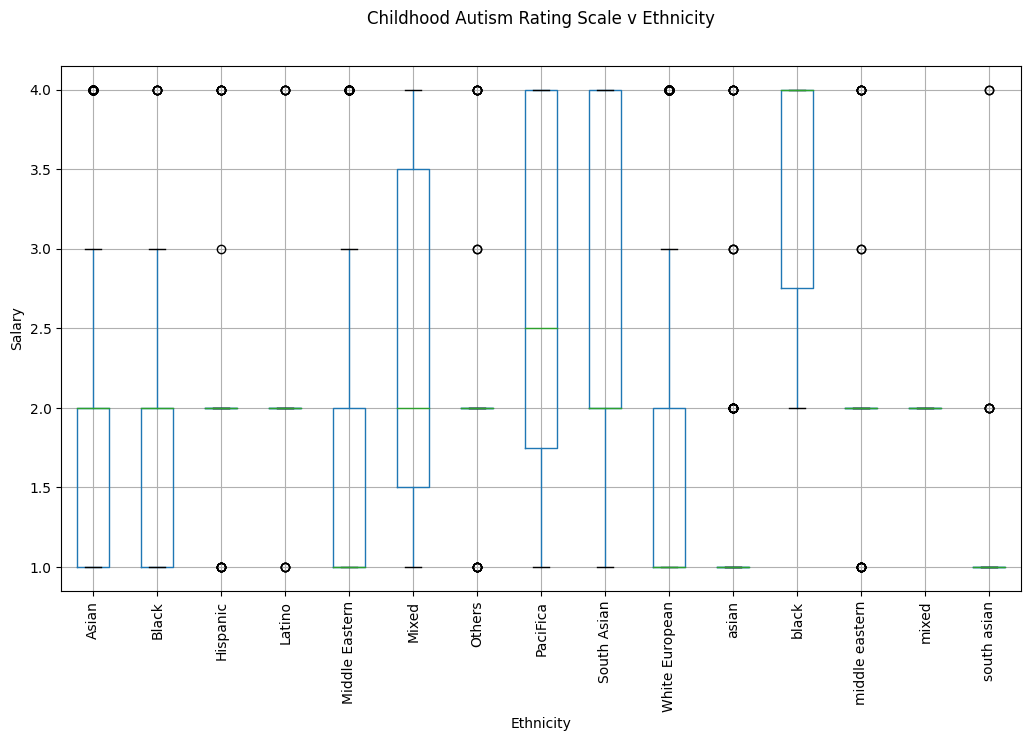

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Childhood Autism Rating Scale', 'Ethnicity', ax=ax)
plt.suptitle('Childhood Autism Rating Scale v Ethnicity')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

,CASE_NO_PATIENT'S,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,A10-score
0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,F,Middle Eastern,Yes,No,Family Member,No,3
1,2,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,M,White European,Yes,No,Family Member,Yes,4
2,3,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,M,Middle Eastern,Yes,No,Family Member,Yes,4
3,4,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,M,Hispanic,No,No,Family Member,Yes,10
4,5,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,F,White European,No,No,Family Member,Yes,9


In [30]:
from sklearn.preprocessing import LabelEncoder
le_speechDisorder = LabelEncoder()
df['Speech Delay/Language Disorder'] = le_speechDisorder.fit_transform(df['Speech Delay/Language Disorder'])
df["Speech Delay/Language Disorder"].unique()

array([1, 0])

In [31]:
le_learnDisorder = LabelEncoder()
df['Learning disorder'] = le_learnDisorder.fit_transform(df['Learning disorder'])
df["Learning disorder"].unique()

array([1, 0])

In [32]:
le_genDisorder = LabelEncoder()
df['Genetic_Disorders'] = le_genDisorder.fit_transform(df['Genetic_Disorders'])
df["Genetic_Disorders"].unique()

array([1, 0])

In [33]:
le_depression = LabelEncoder()
df['Depression'] = le_depression.fit_transform(df['Depression'])
df["Depression"].unique()

array([1, 0, 2])

In [40]:
df["Social/Behavioural Issues"].value_counts()

1    1040
0     945
Name: Social/Behavioural Issues, dtype: int64

In [39]:
df.loc[df["Social/Behavioural Issues"] == 2, "Social/Behavioural Issues"] = 0

In [36]:
le_intellectDisable = LabelEncoder()
df['Global developmental delay/intellectual disability'] = le_intellectDisable.fit_transform(df['Global developmental delay/intellectual disability'])
df["Global developmental delay/intellectual disability"].unique()

array([1, 0])

In [41]:
le_socialIssues = LabelEncoder()
df['Social/Behavioural Issues'] = le_socialIssues.fit_transform(df['Social/Behavioural Issues'])
df["Social/Behavioural Issues"].unique()

array([1, 0])

In [42]:
df = df.dropna()
df.isnull().sum()

CASE_NO_PATIENT'S                                     0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                            0
Global developmental delay/intellectual disability    0
Social/Behavioural Issues                             0
Childhood Autism Rating Scale                         0
Sex                                                   0
Ethnicity                                             0
Jaundice                                              0
Family_mem_with_ASD                                   0
Who_completed_the_test                                0
ASD_traits                                            0
A10-score                                       

In [43]:
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df["Sex"].unique()

array([0, 1])

In [44]:
le_ethnicity = LabelEncoder()
df['Ethnicity'] = le_ethnicity.fit_transform(df['Ethnicity'])
df["Ethnicity"].unique()

array([12,  9,  4,  2,  1,  0,  8,  6, 11, 10,  3,  5, 14, 13,  7])

In [45]:
le_family = LabelEncoder()
df['Family_mem_with_ASD'] = le_family.fit_transform(df['Family_mem_with_ASD'])
df["Family_mem_with_ASD"].unique()

array([0, 1])

In [46]:
df = df.drop(['Who_completed_the_test', 'Jaundice'], axis = 1)

In [54]:
df.head()

,CASE_NO_PATIENT'S,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Family_mem_with_ASD,ASD_traits,A10-score
0,1,3.0,2,3.0,1,1,1,1,1,1,1,0,0,0,3
1,2,6.0,3,4.0,1,1,1,1,1,1,2,1,0,1,4
2,3,7.0,3,4.0,1,1,1,1,1,1,4,1,0,1,4
3,4,1.0,2,10.0,1,1,0,1,1,1,2,1,0,1,10
4,5,3.0,2,9.0,1,1,0,1,1,1,1,0,0,1,9


In [48]:
le_asd = LabelEncoder()
df['ASD_traits'] = le_asd.fit_transform(df['ASD_traits'])
df["ASD_traits"].unique()

array([0, 1])

In [50]:
y = df['ASD_traits']
X = df.drop('ASD_traits', axis=1)


In [74]:
X = X.drop("CASE_NO_PATIENT'S", axis=1)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [90]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

0.19662093940990363


In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


In [92]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

0.23811978273095047


In [93]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)


In [94]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(error)

0.20931897427058713


In [82]:
import pickle


In [95]:
data = {"model": random_forest_model, "le_speechDisorder": le_speechDisorder, "le_learnDisorder": le_learnDisorder, "le_genDisorder": le_genDisorder, "le_depression": le_depression, "le_intellectDisable": le_intellectDisable, "le_socialIssues": le_socialIssues, "le_sex": le_sex, "le_family": le_family}
with open('rfc.pkl', 'wb') as file:
    pickle.dump(data, file)

In [96]:
with open('rfc.pkl', 'rb') as file:
    data = pickle.load(file)

decision_tree_model_loaded = data["model"]
le_speechDisorder = data["le_speechDisorder"]
le_learnDisorder = data["le_learnDisorder"]
le_genDisorder = data["le_genDisorder"]
le_depression = data["le_depression"]
le_intellectDisable = data["le_intellectDisable"]
le_socialIssues = data["le_socialIssues"]
le_sex = data["le_sex"]
le_family = data["le_family"]

In [97]:
X

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Sex,Family_mem_with_ASD,A10-score
0,3.0,2,3.0,1,1,1,1,1,1,1,0,0,3
1,6.0,3,4.0,1,1,1,1,1,1,2,1,0,4
2,7.0,3,4.0,1,1,1,1,1,1,4,1,0,4
3,1.0,2,10.0,1,1,0,1,1,1,2,1,0,10
4,3.0,2,9.0,1,1,0,1,1,1,1,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1.0,7,6.0,0,0,0,0,0,0,1,1,0,1
1981,0.0,14,0.0,0,0,0,0,0,0,1,0,0,0
1982,1.0,7,6.0,0,0,0,0,0,0,1,1,0,1
1983,0.0,14,0.0,0,0,0,0,0,0,1,1,0,0


In [98]:
x = [((2, 4, 7, 1, 1, 1, 1, 1, 1, 8, 0, 0, 7))]

In [100]:
y_pred = decision_tree_model_loaded.predict(x)
print(y_pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
